# MATH 360 Mathematical Modelling 2
#### Team members: Bredan Sunderland, Kevin Wen, Reynaldi Aditama, and Tianyu Su

***

<br>

In [2]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as spi

In [4]:
# get data from csv

customer_df = pd.read_csv('customer.csv')
weather_df = pd.read_csv('vancouver_weather.csv')

<br>

## 1. Problem Statement

Make a mathematical model regarding the total annual revenue of Blue Chip Cafe based on temperature, precipitation, and customer frequency data from 1997 to 2022.

<br>

## 2. Variables and Parameters

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| Average temperature per month | $T$ | <sup>o</sup>$C$ | dependant variable |
| Average precipitation per month | $P$ | $mm$ | dependant variable |
| Average customer per month | $C_0$ | 1 | dependant variable |
| Average of temperature from 1997 to 2022 | $T_0$ | <sup>o</sup>$C$ | dependant variable |
| Average of precipitation from 1997 to 2022 | $P_0$ | $mm$ | dependant variable |
| Rate of change of customers with respect to temperature | $a$ | 1 | parameter |
| Rate of change of customers with respect to precipitation | $b$ | 1 | parameter |
| Average spending per customer | $z$ | \$ | dependant variable |
| Percentage of operational cost per month | $c$ | 1 | parameter |
| Percentage of unexpected cost per month | $e$ | 1 | random variable |
| Revenue per month from 1997 to 2022 | $R_m$ | \$ | independent variable |
| Revenue per year from 1997 to 2022 | $R_y$ | \$ | independent variable |

<br>

## 3. Assumptions and Constraints

- customer frequency stays the same (January 1997 - December 2022)
- average spending customer per month stays the same (January 1997 - December 2022)
- operational cost is 20% of total sales
- randomness of customers and unexpected costs follow normal distribution
- unexpected cost is to cover unexpected things like something broken or leaking or other accident (3% - 10% of total sales)

<br>

## 4. Build Solutions

In [6]:
C0 = np.sum(customer_df.Monthly_Frequency_Customers)
T0 = weather_df.avg_temperature.mean()
P0 = weather_df.precipitation.mean()
a = 1.5  # CHANGE LATER
b = 0.5  # CHANGE LATER
T = []
P = [] 
z = 12  # CHANGE LATER, Search from Blue Chip Cafe prices
c = 0.2  # CHANGE LATER
e = 0.1  # CHANGE LATER

years = [1997 + i for i in range(26)]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# finding the avg_temp and precipitation per month
def find_T_P():
    for i in years:
        for j in month:
            filter = 'year == ' + str(i) + ' & month == ' + str(j)
            filter_temp = weather_df.query(filter)['avg_temperature']
            filter_pre = weather_df.query(filter)['precipitation']
            T.append(filter_temp.mean())
            P.append(filter_pre.mean())
    
# finding the number of customers per month, almost impossible to go below zero since we calculated on a monthly basis not daily
def num_of_customers_per_month():
    return C0 + a * (T - T0) - b * (P - P0)

find_T_P()

In [8]:
n = num_of_customers_per_month()
n_std = np.std(n)

# adjusted n with its randomness
n_adjusted = np.array([stats.norm.rvs(loc=i, scale=n_std, size=1) for i in n]).flatten()

def revenue_per_month():
    return n_adjusted * z * (1 - c) * (1 - stats.norm.rvs(loc=0, scale=e, size=1))

<br>

## 5. Analyze and Assess

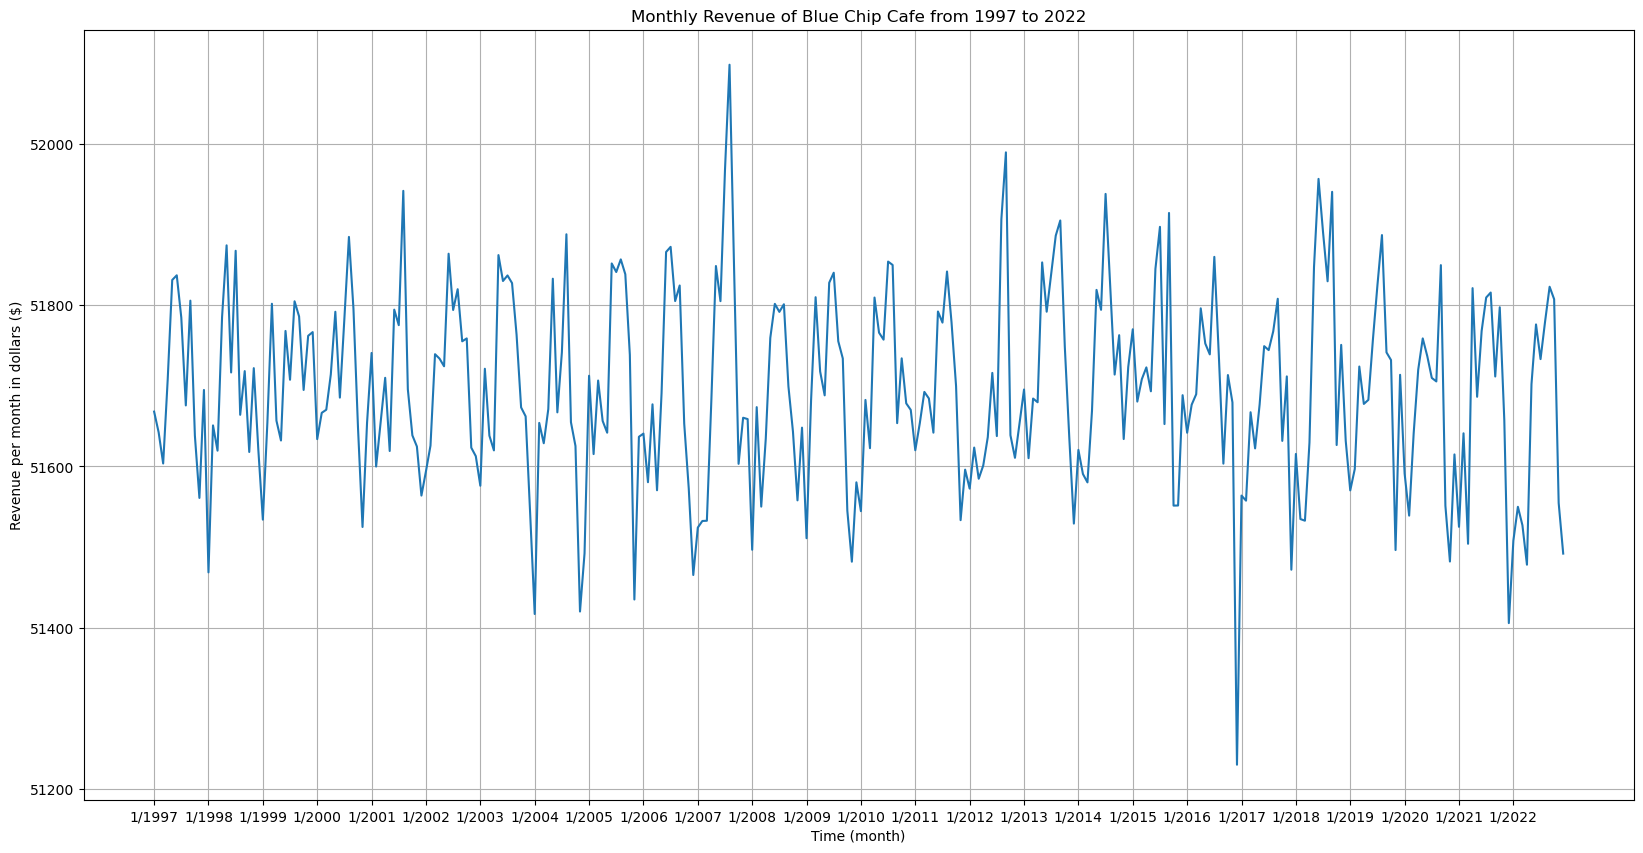

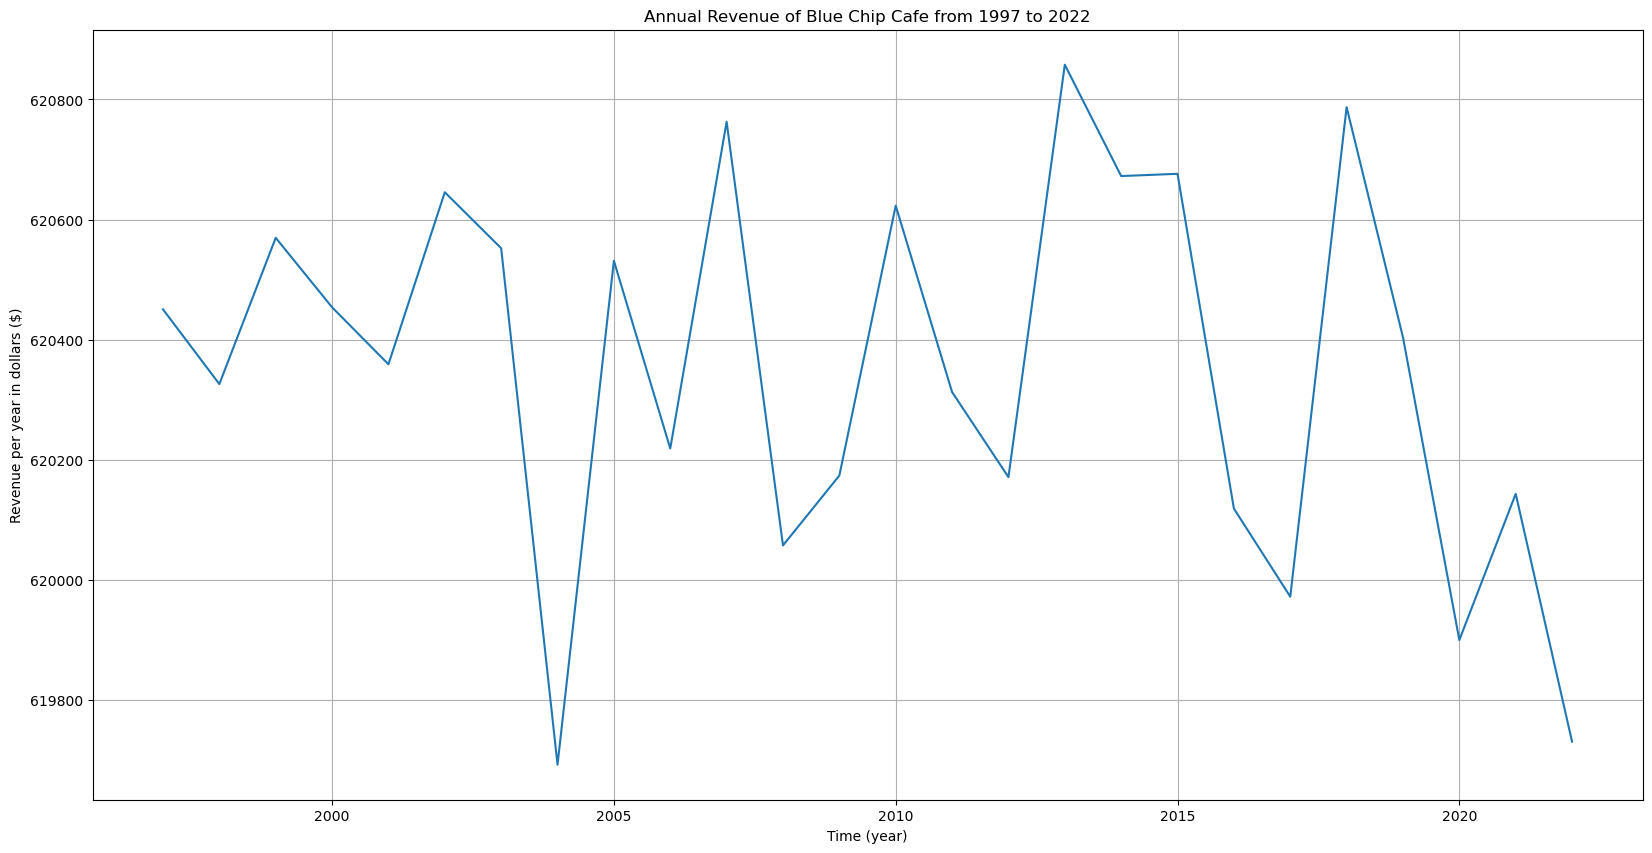

In [10]:
Rm = revenue_per_month()
Ry = []
x_month = []

for i in range(len(years)):
    Ry.append(Rm[i * 12] + Rm[i * 12 + 1] + Rm[i * 12 + 2] + Rm[i * 12 + 3] + Rm[i * 12 + 4] + Rm[i * 12 + 5] + Rm[i * 12 + 6] + Rm[i * 12 + 7] + Rm[i * 12 + 8] + Rm[i * 12 + 9] + Rm[i * 12 + 10] + Rm[i * 12 + 11])

for i in years:
    for j in month:
        x_month.append(str(j) + '/' + str(i))

plt.figure(figsize=(20, 10))
plt.plot(x_month, Rm)
plt.xlabel('Time (month)')
plt.ylabel('Revenue per month in dollars ($)')
plt.title('Monthly Revenue of Blue Chip Cafe from 1997 to 2022')
plt.xticks([i * 12 for i in range(len(years))])
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(years, Ry)
plt.xlabel('Time (year)')
plt.ylabel('Revenue per year in dollars ($)')
plt.title('Annual Revenue of Blue Chip Cafe from 1997 to 2022')
plt.grid(True)
plt.show()

<br>

## 6. Results